In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime

In [6]:
data = pd.read_csv('Causal/30sec2.csv')

In [7]:
date = data["timestamp"]
date
start = datetime.strptime(date[0],'%Y-%m-%d|%H:%M:%S.%f')
timestamps = []
for i in date:
    timestamps.append( (datetime.strptime(i,'%Y-%m-%d|%H:%M:%S.%f') - start).total_seconds() )

timestamps

[0.0,
 0.205,
 0.41,
 0.614,
 0.83,
 1.032,
 1.241,
 1.443,
 1.644,
 1.845,
 2.064,
 2.265,
 2.468,
 2.67,
 2.874,
 3.077,
 3.279,
 3.482,
 3.683,
 3.885,
 4.087,
 4.304,
 4.507,
 4.709,
 4.912,
 5.113,
 5.314,
 5.518,
 5.72,
 5.926,
 6.124,
 6.325,
 6.544,
 6.745,
 6.947,
 7.149,
 7.351,
 7.554,
 7.755,
 7.974,
 8.177,
 8.378,
 8.579,
 8.781,
 8.982,
 9.185,
 9.387,
 9.591,
 9.79,
 9.991,
 10.192,
 10.394,
 10.596,
 10.801,
 11.005,
 11.203,
 11.408,
 11.609,
 11.811,
 12.012,
 12.216,
 12.42,
 12.622,
 12.823,
 13.025,
 13.227,
 13.428,
 13.631,
 13.835,
 14.037,
 14.239,
 14.441,
 14.642,
 14.844,
 15.045,
 15.246,
 15.448,
 15.651,
 15.853,
 16.055,
 16.259,
 16.462,
 16.666,
 16.868,
 17.072,
 17.277,
 17.48,
 17.682,
 17.899,
 18.104,
 18.308,
 18.509,
 18.712,
 18.913,
 19.115,
 19.318,
 19.521,
 19.724,
 19.927,
 20.13,
 20.333,
 20.537,
 20.737,
 20.94,
 21.141,
 21.342,
 21.543,
 21.744,
 21.945,
 22.146,
 22.347,
 22.55,
 22.754,
 22.955,
 23.157,
 23.359,
 23.562,
 23.763,


In [8]:
engagement = []
alpha = data["alpha"].to_numpy()
beta = data["beta"].to_numpy()
theta = data["theta"].to_numpy()
difficulty = data["diff"].to_numpy()

def transform(x):
    return (((x + 1) * (100)) / (2))

alpha_ = np.exp(alpha)
beta_ = np.exp(beta)
theta_ = np.exp(theta)

engagement = beta_ / (alpha_ + theta_)

In [9]:
index_diff_change = []

for i in range(1, int(difficulty[-1])+1):
    index_diff_change.append(np.where(difficulty == i)[0][0])

time_diff_change = [timestamps[i] for i in index_diff_change]
time_diff_change

[246.942,
 276.781,
 306.866,
 337.025,
 366.959,
 456.904,
 487.033,
 516.908,
 546.894,
 576.871]

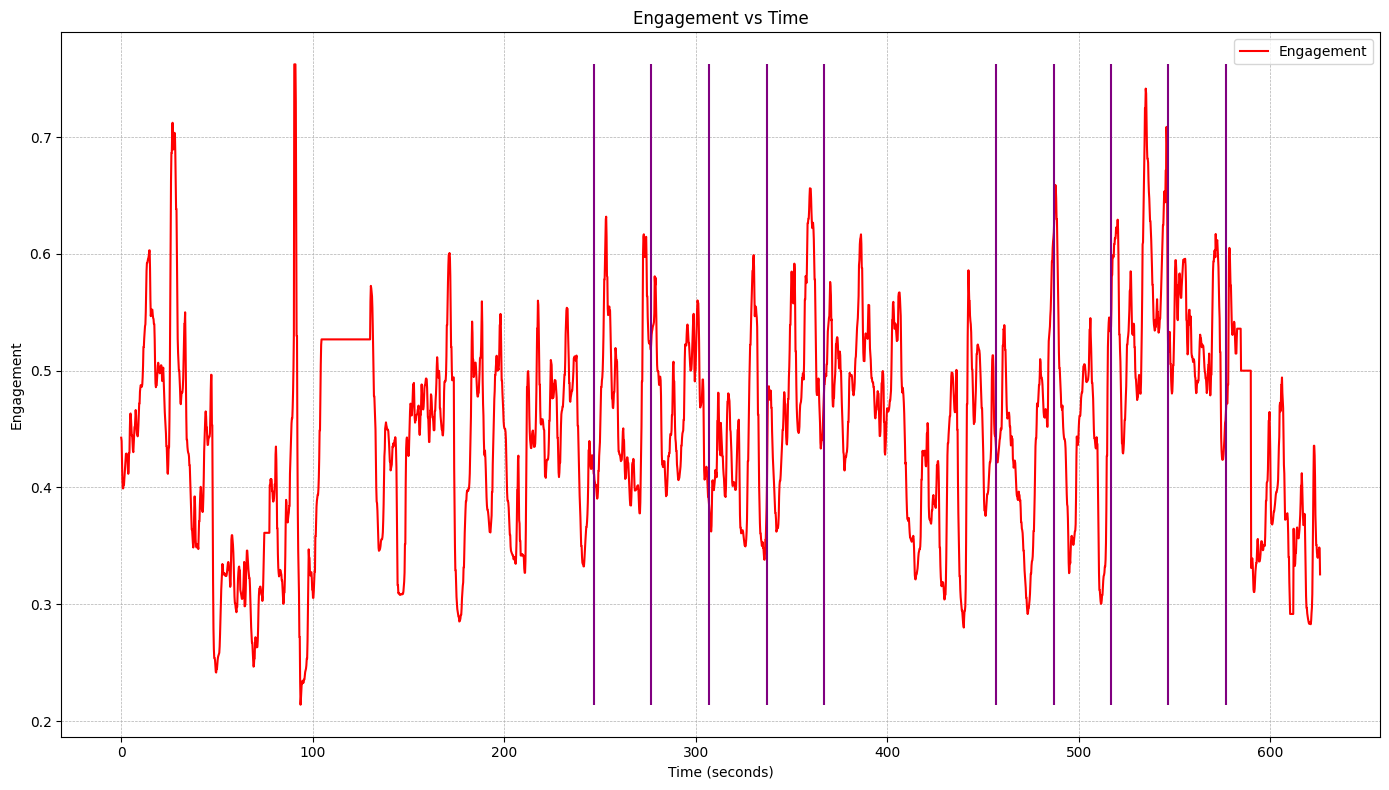

In [10]:
plt.figure(figsize=(14,8))
plt.plot(timestamps, engagement, color = "r", label = "Engagement")
plt.vlines(x = time_diff_change, ymin = min(engagement), ymax = max(engagement),
           colors="purple")

plt.title("Engagement vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Engagement")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [11]:
eng_blocks = []

for i in range(len(index_diff_change)+1):
    sum = 0
    deltat = 0

    if i == 0:
        sum = np.sum(engagement[0:index_diff_change[i]])
        deltat = time_diff_change[0]
    elif i == len(index_diff_change):
        sum = np.sum(engagement[index_diff_change[i-1]:])
        deltat = timestamps[-1] - time_diff_change[i-1]
    else:
        sum = np.sum(engagement[index_diff_change[i-1]:index_diff_change[i]])
        deltat = time_diff_change[i] - time_diff_change[i-1]

    print(i)
    avg = sum / deltat
    eng_blocks.append(avg)

print(eng_blocks)


0
1
2
3
4
5
6
7
8
9
10
[np.float64(2.12463270988279), np.float64(2.323705715055904), np.float64(2.33504320153409), np.float64(2.0897492782491636), np.float64(2.421784660875246), np.float64(2.229381958452638), np.float64(2.1330962979004804), np.float64(2.1996097043843252), np.float64(2.7749541586563855), np.float64(2.5903876249228173), np.float64(2.001962072643365)]


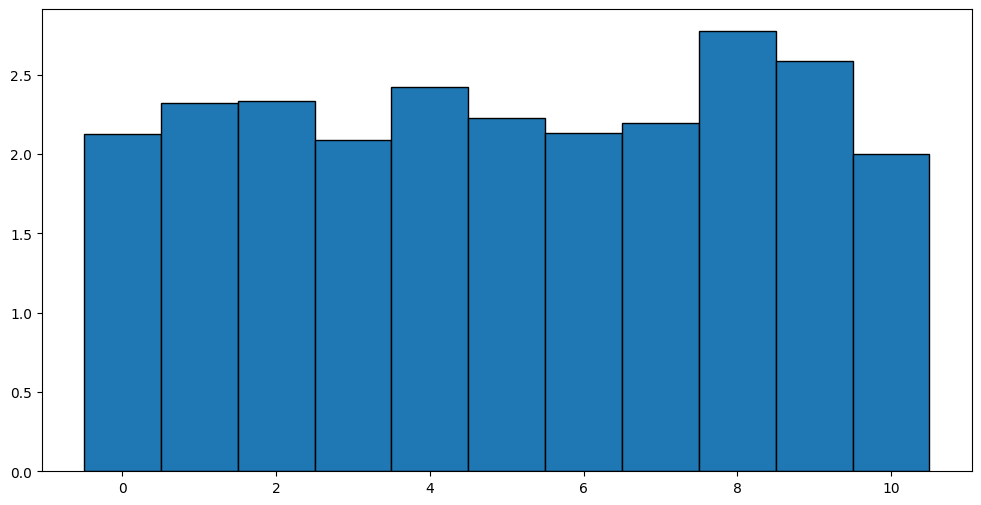

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(index_diff_change)+1)
rects1 = ax.bar(x, eng_blocks, 1, edgecolor = "black")